In [1]:
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("kaggle_train.csv",parse_dates=['date'])

In [3]:
df.head()

,Unnamed: 0,date,store_nbr,sales,onpromotion,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,...,c_Cayambe,c_Cuenca,c_Ambato,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type
0,0,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
1,1,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
2,2,2013-01-01,25,2,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
3,3,2013-01-01,25,810,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
4,4,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3


In [4]:
df['day']=df['date'].dt.day
df['month']=df['date'].dt.month
df['year']=df['date'].dt.year

In [5]:
df.head()

,Unnamed: 0,date,store_nbr,sales,onpromotion,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,0,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
1,1,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
2,2,2013-01-01,25,2,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
3,3,2013-01-01,25,810,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013
4,4,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,3,1,1,2013


In [6]:
df.drop(['Unnamed: 0','date','onpromotion'],1,inplace=True)

In [7]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [8]:
def rmse(y_true,y_pred):
    return np.sqrt(np.square(np.subtract(y_true,y_pred)).mean())

In [9]:
def rsquared(y_true, y_pred):
    rss = np.sum(np.square((y_true- y_pred)))
    mean = np.mean(y_true)
    sst = np.sum(np.square(y_true-mean))
    r_square = 1 - (rss/sst)
    return r_square

In [10]:
performance=pd.DataFrame({"Model":[],
                         "RMSE Error":[],
                         "R squared value":[]})

In [11]:
def checknegative(predict):
    negative=False
    for i in predict:
        if i<0:
            negative=True
    if negative==True:
        print("negative values are present")
    else:
        print("no negative values are present")

In [12]:
def handlenegative(predict):
    pred=[]
    for i in predict:
        if i>0:
            pred.append(i)
        else:
            pred.append(0)
    print("negative values are handled successfully")
    return pred

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb=GaussianNB()

In [15]:
X=df.drop("sales",1)
y=df.sales

In [16]:
X_train=X[:-400000]
X_test=X[-400000:]
y_train=y[:-400000]
y_test=y[-400000:]

#we can also use below code
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=400000,random_state=0)

In [17]:
nb.fit(X_train,y_train)

GaussianNB()

In [18]:
y_predict=[]

In [19]:
bsize=4000
for batch in range(int(X_test.shape[0]/bsize)):
    y_predict.append(nb.predict(X_test[batch*bsize:(batch+1)*bsize]))

In [20]:
y_pred=[]

In [21]:
for i in y_predict:
    a=i.tolist()
    for j in a:
        y_pred.append(j)

In [22]:
checknegative(y_pred)

no negative values are present


In [23]:
import numpy as np

In [24]:
print("root mean squared error for testing dataframe: ",rmse(y_test,y_pred))

root mean squared error for testing dataframe:  5943.463227326093


In [25]:
print("r squared value: ",rsquared(y_test,y_pred))

r squared value:  -22.60692728314202


In [26]:
naivebayes={'Model': 'Naive Bayes Regressor', 'RMSE Error': rmse(y_test,y_pred), 'R squared value': rsquared(y_test,y_pred)}
performance = performance.append(naivebayes, ignore_index = True)

In [27]:
import matplotlib.pyplot as plt

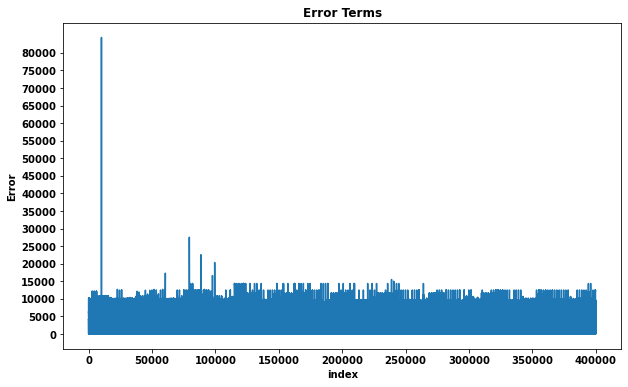

In [28]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.yticks(np.arange(0,max(y_test-y_pred),5000))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [29]:
import seaborn as sns

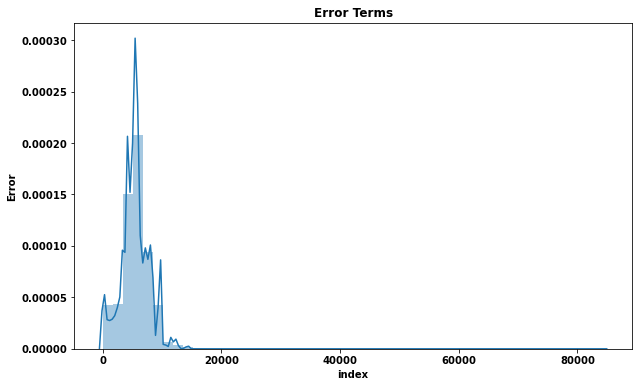

In [30]:
plt.figure(figsize=(10,6))
sns.distplot(abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [31]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":abs(y_test-y_pred)})

In [32]:
new_df=pd.concat([X_test,error], axis=1)

In [33]:
new_df=new_df[new_df['error']<12000]

In [34]:
X=new_df.drop(['true y','prediction y','error'],1)

In [35]:
y=new_df['true y']

In [36]:
X_train=X[:-4000]
X_test=X[-4000:]
y_train=y[:-4000]
y_test=y[-4000:]

In [37]:
y_predict=[]

In [38]:
bsize=1000
for batch in range(int(X_test.shape[0]/bsize)):
    y_predict.append(nb.predict(X_test[batch*bsize:(batch+1)*bsize]))

In [39]:
y_pred=[]

In [40]:
checknegative(y_pred)

no negative values are present


In [41]:
for i in y_predict:
    a=i.tolist()
    for j in a:
        y_pred.append(j)

In [42]:
print("root mean squared error for testing dataframe: ",rmse(y_test,y_pred))

root mean squared error for testing dataframe:  5633.309693399609


In [43]:
print("r squared value: ",rsquared(y_test,y_pred))

r squared value:  -22.343949869723133


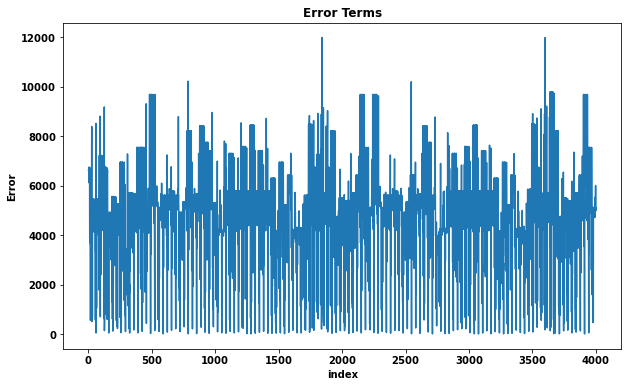

In [44]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,4001,1)]
plt.plot(c,abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [45]:
X=df.drop("sales",1)

In [46]:
y=df.sales

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [49]:
X_train.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
1420095,34,6,1,49.07,1980,0,0,0,0,0,...,0,0,0,0,0,0,1,1,6,2016
1808198,6,13,1,53.38,1746,0,0,0,0,0,...,0,0,0,0,0,0,3,11,4,2017
1887730,42,2,1,46.41,999,0,0,0,0,0,...,0,0,0,0,0,0,3,13,6,2017
165058,26,10,0,93.41,838,0,0,0,0,0,...,0,0,0,0,0,0,3,3,6,2013
1604357,5,4,1,48.72,1186,0,0,0,0,0,...,0,0,0,0,0,0,3,28,10,2016


In [50]:
class MLR():   
    def __init__ (self):
        self.beta=None
    
    def fit(self, X_train, y_train):
        #fit the xtrain and ytrain to the model
        #inserting 1 value at the starting of each row
        X_train = np.c_[np.ones(len(X_train)), X_train]
        #calculating coefficients
        #pinv means Compute the (Moore-Penrose) pseudo-inverse of a matrix.
        #https://numpy.org/doc/stable/reference/generated/numpy.linalg.pinv.html
        self.beta = np.linalg.pinv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)
        
    def predict(self, X_test):
        #predicting the y value from X_test features
        X_test = np.c_[np.ones((len(X_test), 1)), X_test]
        #dot product of X_test and beta
        y_pred = np.dot(X_test, self.beta)
        return y_pred    

In [51]:
lr=MLR()

In [52]:
lr.fit(X_train, y_train)

In [53]:
y_test_pred=lr.predict(X_test)

In [54]:
checknegative(y_test_pred)

negative values are present


In [55]:
y_pred=handlenegative(y_test_pred)

negative values are handled successfully


In [56]:
root_mse=rmse(y_test,y_pred)

In [57]:
root_r2score=rsquared(y_test,y_pred)

In [58]:
print("root mean squared error for testing dataframe: ",root_mse)

root mean squared error for testing dataframe:  606.708312089057


In [59]:
print("r squared value: ",root_r2score)

r squared value:  0.6299401034012488


In [60]:
multi_lr={'Model': 'Multiple Linear Regression', 'RMSE Error': root_mse, 'R squared value': root_r2score}

In [61]:
performance = performance.append(multi_lr, ignore_index = True)

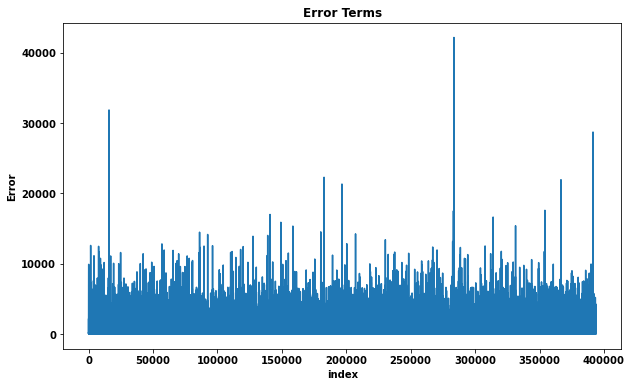

In [62]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,abs(y_test-y_test_pred))
#plt.yticks(np.arange(0,45000,5000))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

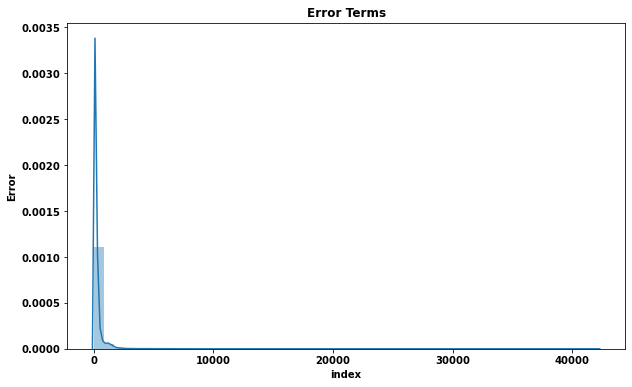

In [63]:
plt.figure(figsize=(10,6))
sns.distplot(abs(y_test-y_test_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [64]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_test_pred,
                   "error":abs(y_test-y_test_pred)})

In [65]:
error.head()

,true y,prediction y,error
1545018,195,363.182634,168.182634
412575,175,92.231495,82.768505
310040,332,246.432423,85.567577
1898772,291,157.325165,133.674835
1202460,13,279.403057,266.403057


In [66]:
new_df=pd.concat([X_test,error], axis=1)

In [67]:
new_df=new_df[new_df['error']<10000]

In [68]:
new_df.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year,true y,prediction y,error
1545018,38,4,1,45.88,1349,0,0,0,0,0,...,0,0,0,3,9,9,2016,195,363.182634,168.182634
412575,27,1,0,93.78,1245,0,0,0,0,0,...,0,0,0,3,15,1,2014,175,92.231495,82.768505
310040,23,9,0,102.17,1286,0,0,0,0,0,...,0,0,0,3,11,10,2013,332,246.432423,85.567577
1898772,52,11,1,42.48,1829,0,0,0,0,0,...,0,0,0,0,21,6,2017,291,157.325165,133.674835
1202460,24,1,1,37.64,2466,0,0,0,0,0,...,0,0,0,3,7,12,2015,13,279.403057,266.403057


In [69]:
X=new_df.drop(['true y','prediction y','error'],1)

In [70]:
X.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
1545018,38,4,1,45.88,1349,0,0,0,0,0,...,0,1,0,0,0,0,3,9,9,2016
412575,27,1,0,93.78,1245,0,0,0,0,0,...,1,0,0,0,0,0,3,15,1,2014
310040,23,9,0,102.17,1286,0,0,0,0,0,...,0,0,0,0,0,0,3,11,10,2013
1898772,52,11,1,42.48,1829,0,0,0,0,0,...,0,0,1,0,0,0,0,21,6,2017
1202460,24,1,1,37.64,2466,0,0,0,0,0,...,0,0,0,0,0,0,3,7,12,2015


In [71]:
y=new_df['true y']

In [72]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [73]:
y_test_pred=lr.predict(X_test)

In [74]:
checknegative(y_test_pred)

negative values are present


In [75]:
y_pred=handlenegative(y_test_pred)

negative values are handled successfully


In [76]:
print("root mean squared error after removing errors more than 10000: ",rmse(y_test,y_pred))

root mean squared error after removing errors more than 10000:  571.7257118414667


In [77]:
print("r squared value after removing the errors more than 10000: ",rsquared(y_test,y_pred))

r squared value after removing the errors more than 10000:  0.6484780669020809


In [78]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":abs(y_test-y_pred)})

In [79]:
error

,true y,prediction y,error
1018459,8,0.000000,8.000000
436430,892,851.419696,40.580304
924748,8,0.000000,8.000000
1847459,0,0.000000,0.000000
1282765,93,117.853002,24.853002
...,...,...,...
623249,55,0.000000,55.000000
311809,216,391.286152,175.286152
1185194,95,363.342205,268.342205
1210945,297,45.368277,251.631723


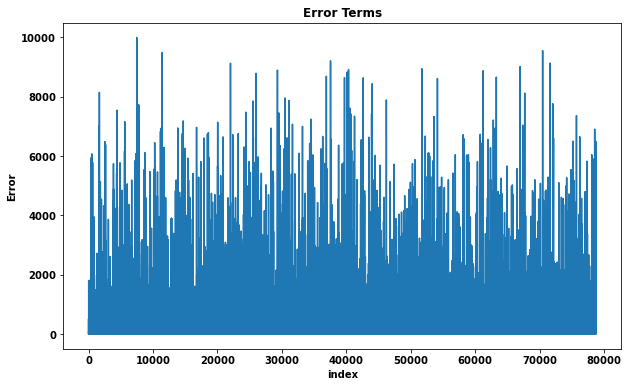

In [80]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,error['error'])
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [81]:
from sklearn.tree import DecisionTreeRegressor

In [82]:
X=df.drop("sales",1)

In [83]:
y=df.sales

In [84]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [85]:
rmse_depth=[]
for i in range(1,30):
    dt=DecisionTreeRegressor(criterion='mse',max_depth=i)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    rmse_depth.append(rmse)
    
rmse_depth=np.array(rmse_depth)

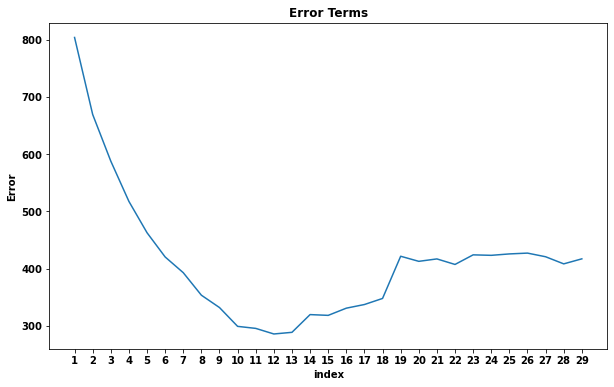

In [86]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(rmse_depth)+1,1)]
plt.plot(c,rmse_depth)
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.xticks(np.arange(1,30))
plt.show()

In [87]:
print("From the above graph we can say that depth of {} having least rmse loss {}".format(rmse_depth.argmin()+1,rmse_depth.min()))

From the above graph we can say that depth of 12 having least rmse loss 285.89690089465455


In [88]:
dt=DecisionTreeRegressor(criterion='mse',max_depth=rmse_depth.argmin()+1)

In [89]:
dt.fit(X_train,y_train)
y_pred=dt.predict(X_test)

In [90]:
checknegative(y_pred)

no negative values are present


In [91]:
dt_rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())

In [92]:
dt_r2score=rsquared(y_test,y_pred)

In [93]:
print("root mean squared error for decision tree regressor: ",dt_rmse)

root mean squared error for decision tree regressor:  278.0953009348953


In [94]:
print("r squared value: ",root_r2score)

r squared value:  0.6299401034012488


In [95]:
decision={'Model': 'Decision Tree Regressor', 'RMSE Error': dt_rmse, 'R squared value': dt_r2score}

In [96]:
performance = performance.append(decision, ignore_index = True)

In [97]:
performance

,Model,RMSE Error,R squared value
0,Naive Bayes Regressor,5943.463227,-22.606927
1,Multiple Linear Regression,606.708312,0.629940
2,Decision Tree Regressor,278.095301,0.922250


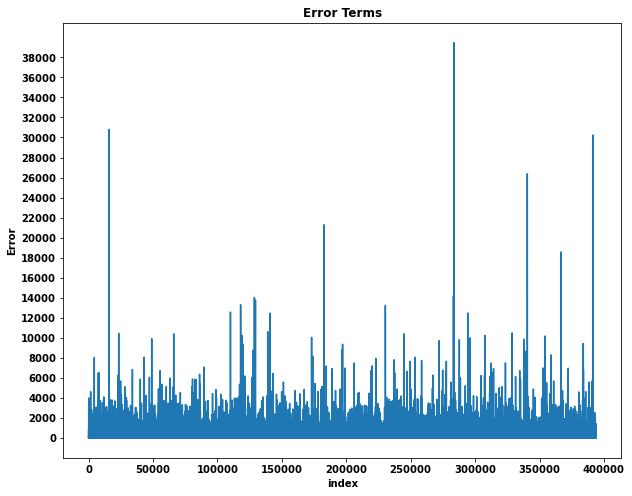

In [98]:
plt.figure(figsize=(10,8))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.yticks(np.arange(0,40000,2000))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

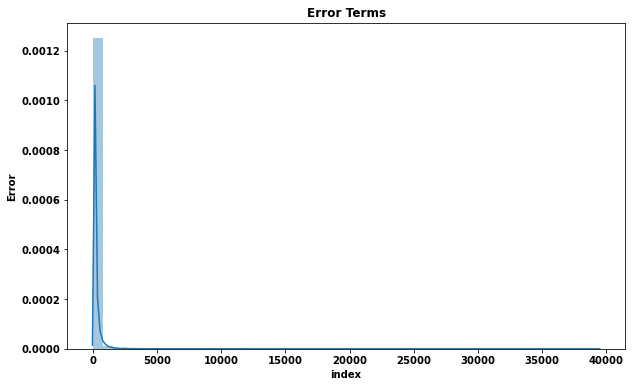

In [99]:
plt.figure(figsize=(10,6))
sns.distplot(abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [100]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":abs(y_test-y_pred)})

In [101]:
error

,true y,prediction y,error
1545018,195,241.324150,46.324150
412575,175,178.728682,3.728682
310040,332,382.140550,50.140550
1898772,291,39.257054,251.742946
1202460,13,39.257054,26.257054
...,...,...,...
1882759,73,20.267128,52.732872
300215,0,39.257054,39.257054
1515018,2,39.257054,37.257054
462015,0,39.257054,39.257054


In [102]:
new_df=pd.concat([X_test,error], axis=1)

In [103]:
new_df=new_df[new_df['error']<6000]

In [104]:
new_df.shape

(393617, 42)

In [105]:
X=new_df.drop(['true y','prediction y','error'],1)

In [106]:
y=new_df['true y']

In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [108]:
y_pred=dt.predict(X_test)

In [109]:
checknegative(y_pred)

no negative values are present


In [110]:
print("root mean squared error after removing errors more than 6000: ",np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()))

root mean squared error after removing errors more than 6000:  225.52465539510095


In [111]:
print("r squared value after removing the errors more than 5000: ",rsquared(y_test,y_pred))

r squared value after removing the errors more than 5000:  0.9455277134002111


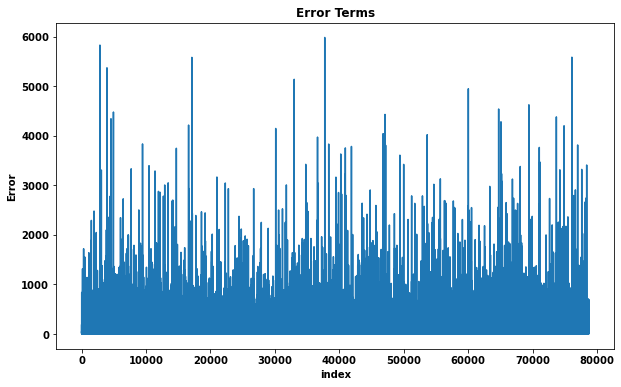

In [112]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [113]:
from hyperopt import hp,fmin,tpe,STATUS_OK,Trials
from sklearn.ensemble import RandomForestRegressor

In [114]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [115]:
X=df.drop('sales',1)

In [116]:
y=df.sales

In [117]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=10000,test_size=20000,random_state=0)

In [118]:
X_train.shape

(10000, 39)

In [119]:
params = {'max_depth': hp.quniform('max_depth', 10, 1200, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'criterion':hp.choice('criterion',['squared_error','absolute_error','poisson']),
        'n_estimators' : hp.choice('n_estimators', [10, 50, 300, 750, 1200])
    }

In [120]:
params

{'max_depth': <hyperopt.pyll.base.Apply at 0x18a06cb7e50>,
 'max_features': <hyperopt.pyll.base.Apply at 0x18a06cb7fa0>,
 'min_samples_leaf': <hyperopt.pyll.base.Apply at 0x18a06ca6400>,
 'min_samples_split': <hyperopt.pyll.base.Apply at 0x18a06ca6520>,
 'criterion': <hyperopt.pyll.base.Apply at 0x18a06ca6eb0>,
 'n_estimators': <hyperopt.pyll.base.Apply at 0x18a06ca6670>}

In [121]:
def objective(params):
    est = int(params['n_estimators'])
    md = int(params['max_depth'])
    msl = int(params['min_samples_leaf'])
    mss = int(params['min_samples_split'])
    model = RandomForestRegressor(n_estimators=est,max_depth=md,min_samples_leaf=msl,min_samples_split=mss)
    model.fit(X_train,y_train)
    y_pred_hyperopt = model.predict(X_test)
    y_pred=[]
    for i in y_pred_hyperopt:
        if i<0:
            y_pred.append(0)
        else:
            y_pred.append(i)
    score = np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    return score

def optimize(trial):
    params={'n_estimators':hp.uniform('n_estimators',100,500),
           'max_depth':hp.uniform('max_depth',5,20),
           'min_samples_leaf':hp.uniform('min_samples_leaf',1,5),
           'min_samples_split':hp.uniform('min_samples_split',2,6)}
    best=fmin(fn=objective,space=params,algo=tpe.suggest,trials=trial,max_evals=100)
    return best

trial=Trials()
best=optimize(trial)

100%|███████████████████████████████████████████████| 100/100 [22:56<00:00, 13.77s/trial, best loss: 423.3842194084863]


In [122]:
print("The best parameters that we need to consider for random forest are:",best)

The best parameters that we need to consider for random forest are: {'max_depth': 19.07621963837751, 'min_samples_leaf': 1.310492950561803, 'min_samples_split': 2.328111696120838, 'n_estimators': 480.4034615953488}


In [123]:
trainedforest = RandomForestRegressor(max_depth = best['max_depth'],  
                                       min_samples_leaf = round(best['min_samples_leaf']), 
                                       min_samples_split = round(best['min_samples_split']), 
                                       n_estimators = int(best['n_estimators'])).fit(X_train,y_train)

In [124]:
y_pred_hyperopt = trainedforest.predict(X_test)

In [125]:
checknegative(y_pred_hyperopt)

no negative values are present


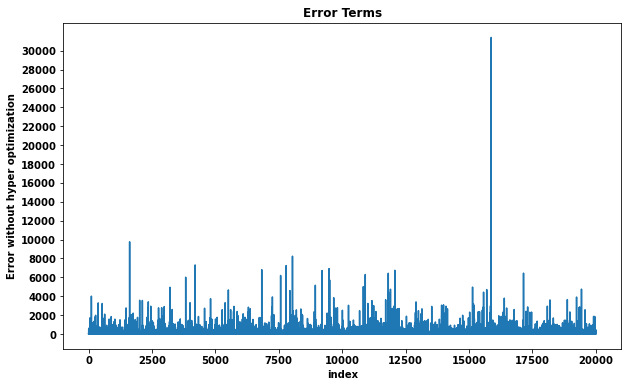

In [126]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,abs(y_test-y_pred_hyperopt))
plt.yticks(np.arange(0,max(abs(y_test-y_pred_hyperopt)),2000))
plt.ylabel("Error without hyper optimization")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [127]:
rf_rmse=np.sqrt(np.square(np.subtract(y_test,y_pred_hyperopt)).mean())
rf_r2score=rsquared(y_test,y_pred_hyperopt)

In [128]:
print("root mean squared error for Random Forest: ",rf_rmse)

root mean squared error for Random Forest:  427.1773805658669


In [129]:
print("R Squared Value for Random Forest: ",rf_r2score)

R Squared Value for Random Forest:  0.8283623021073745


In [130]:
randomforest={'Model': 'Random Forest Regressor', 'RMSE Error': rf_rmse, 'R squared value': rf_r2score}
performance = performance.append(randomforest, ignore_index = True)

In [131]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred_hyperopt,
                   "error":abs(y_test-y_pred_hyperopt)})

In [132]:
new_df=pd.concat([X_test,error], axis=1)

In [133]:
new_df=new_df[(new_df['error']<4500)]

In [134]:
X=new_df.drop(['true y','prediction y','error'],1)

In [135]:
y=new_df['true y']

In [136]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [137]:
y_pred=trainedforest.predict(X_test)

In [138]:
checknegative(y_pred)

no negative values are present


In [139]:
print("root mean squared error after removing errors more than 2000: ",np.sqrt(np.square(np.subtract(y_test,y_pred)).mean()))

root mean squared error after removing errors more than 2000:  303.0856028656308


In [140]:
print("r squared value after removing the errors more than 2000: ",rsquared(y_test,y_pred))

r squared value after removing the errors more than 2000:  0.8964528931773439


In [141]:
error=pd.DataFrame({"true y":y_test.values,
                   "prediction y":y_pred,
                   "error":y_test-y_pred})

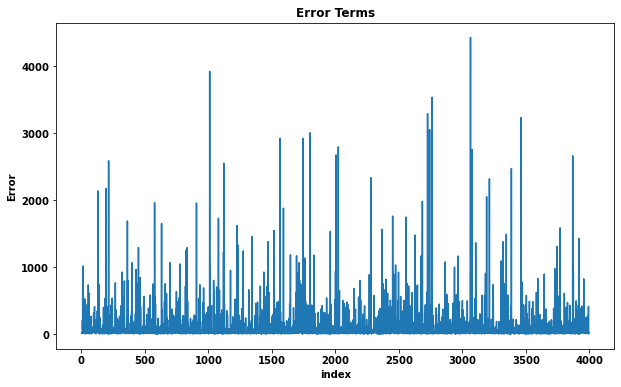

In [142]:
plt.figure(figsize=(10,6))
c = [i for i in range(1,len(y_pred)+1,1)]
plt.plot(c,abs(y_test-y_pred))
plt.ylabel("Error")
plt.xlabel("index")
plt.title("Error Terms")
plt.show()

In [143]:
df=pd.read_csv("kaggle_train.csv",parse_dates=['date'])

In [144]:
new_df=pd.DataFrame({"date":df.groupby(['date'])['sales'].mean().index,
                       "sales":df.groupby(['date'])['sales'].mean().values})

In [145]:
new_df.head()

,date,sales
0,2013-01-01,76.000000
1,2013-01-02,326.733860
2,2013-01-03,238.047431
3,2013-01-04,233.429513
4,2013-01-07,221.353096


<AxesSubplot:>

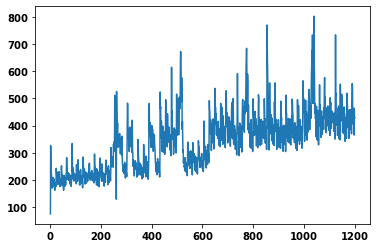

In [146]:
new_df['sales'].plot()

In [147]:
from statsmodels.tsa.stattools import adfuller

In [148]:
def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [149]:
adfuller_test(new_df['sales'])

ADF Test Statistic : -2.7141689969899585
p-value : 0.07161834249784746
#Lags Used : 23
Number of Observations Used : 1178
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [150]:
new_df['seasonal_difference']=new_df['sales']-new_df['sales'].shift(12)

In [151]:
adfuller_test(new_df['seasonal_difference'].dropna())

ADF Test Statistic : -11.210675700219825
p-value : 2.1294593773025642e-20
#Lags Used : 23
Number of Observations Used : 1166
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


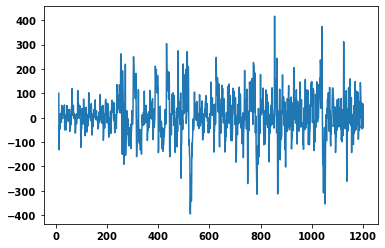

In [152]:
new_df['seasonal_difference'].plot()
plt.show()

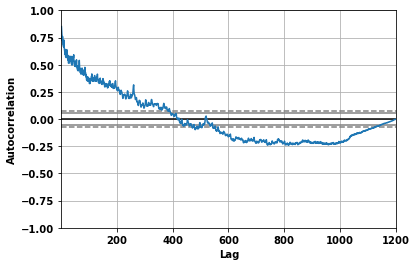

In [153]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(new_df['sales'])
plt.show()

In [154]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(new_df['sales'], trace=True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12831.700, Time=0.93 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13096.566, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12977.245, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12912.459, Time=0.43 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13094.598, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12849.060, Time=0.79 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12851.632, Time=0.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12791.158, Time=0.97 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12851.180, Time=0.89 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=12629.758, Time=2.06 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=12714.098, Time=0.81 sec
 ARIMA(5,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.86 sec
 ARIMA(4,1,3)(0,0,0)[0] intercept   : AIC=12553.785, Time=2.03 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.73 sec
 ARIMA(5,1,3)(0,0,0)[0] interce

In [155]:
train=new_df.iloc[:-30]
test=new_df.iloc[-30:]
print(train.shape,test.shape)

(1172, 3) (30, 3)


In [156]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(train['sales'],order=(4,1,3))
model=model.fit()
model.summary()

C:\Users\ganes\madara\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  sales   No. Observations:                 1172
Model:                 ARIMA(4, 1, 3)   Log Likelihood               -6119.441
Date:                Mon, 14 Mar 2022   AIC                          12254.881
Time:                        12:37:33   BIC                          12295.406
Sample:                             0   HQIC                         12270.165
                               - 1172                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9719      0.031    -31.442      0.000      -1.032      -0.911
ar.L2         -0.1237      0.058     -2.122      0.034      -0.238      -0.009
ar.L3          0.3769      0.060      6.327      0.000       0.260       0.494
ar.L4         -0.1632      0.032     -5.127      0.000      -0.226      -0.101
ma.L1          0.7265      0.029     24.860      0.000       0.669       0.784
ma.L2         -0.3749      0.041     -9.135      0.000      -0.455      -0.294
ma.L3         -0.7772      0.026    -29.846      0.000      -0.828      -0.726
sigma2      2093.6337     36.838     56.834      0.000    2021.433    2165.834
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              8370.37
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.45
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

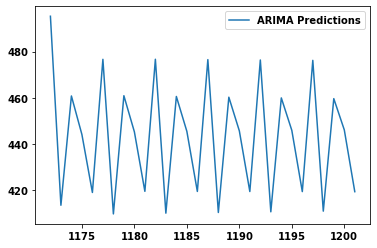

In [157]:
start=len(train)
end=len(train)+len(test)-1
prediction=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
prediction.plot(legend=True)

In [158]:
arima_rmse=np.sqrt(np.square(np.subtract(test['sales'],prediction)).mean())
print("root mean squared error for arima model: ",arima_rmse)

root mean squared error for arima model:  40.79714204980144


In [159]:
arima_r2score=rsquared(test['sales'].values,prediction)
print("r squared value: ",root_r2score)

r squared value:  0.6299401034012488


In [160]:
arima_model={'Model': 'ARIMA', 'RMSE Error': arima_rmse, 'R squared value': arima_r2score}
performance = performance.append(arima_model, ignore_index = True)

In [161]:
prediction.index=new_df.index[start:end+1]

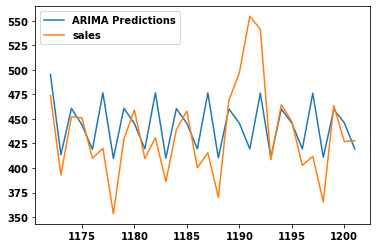

In [162]:
prediction.plot(legend=True)
test['sales'].plot(legend=True)
plt.show()

In [163]:
performance

,Model,RMSE Error,R squared value
0,Naive Bayes Regressor,5943.463227,-22.606927
1,Multiple Linear Regression,606.708312,0.629940
2,Decision Tree Regressor,278.095301,0.922250
3,Random Forest Regressor,427.177381,0.828362
4,ARIMA,40.797142,0.181399


In [164]:
df.head()

,Unnamed: 0,date,store_nbr,sales,onpromotion,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,...,c_Cayambe,c_Cuenca,c_Ambato,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type
0,0,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
1,1,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
2,2,2013-01-01,25,2,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
3,3,2013-01-01,25,810,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3
4,4,2013-01-01,25,0,0,1,0,93.14,770,0,...,0,0,0,0,0,0,0,0,0,3


In [165]:
df['day']=df['date'].dt.day

In [166]:
df['month']=df['date'].dt.month

In [167]:
df['year']=df['date'].dt.year

In [168]:
#as cluster depends on store_nbr
df.drop(["date",'Unnamed: 0','onpromotion'],1,inplace=True)

In [169]:
X=df.drop(['sales'],1)

In [170]:
y=df.sales

In [171]:
X.head()

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,1,0,93.14,770,0,1,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,1,0,93.14,770,0,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [172]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [173]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [174]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [175]:
X=df.drop(['sales'],1)

In [176]:
y=df.sales

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [178]:
X_train

,store_nbr,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
1420095,34,6,1,49.07,1980,0,0,0,0,0,...,0,0,0,0,0,0,1,1,6,2016
1808198,6,13,1,53.38,1746,0,0,0,0,0,...,0,0,0,0,0,0,3,11,4,2017
1887730,42,2,1,46.41,999,0,0,0,0,0,...,0,0,0,0,0,0,3,13,6,2017
165058,26,10,0,93.41,838,0,0,0,0,0,...,0,0,0,0,0,0,3,3,6,2013
1604357,5,4,1,48.72,1186,0,0,0,0,0,...,0,0,0,0,0,0,3,28,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152315,14,7,0,93.98,1435,0,0,0,0,0,...,0,0,0,0,0,0,2,22,5,2013
963395,38,4,0,58.88,1596,0,0,0,0,0,...,0,1,0,0,0,0,3,22,5,2015
117952,43,10,1,88.04,1375,0,0,0,0,0,...,0,0,0,0,0,1,4,19,4,2013
1484405,22,7,1,43.41,666,0,0,0,0,0,...,0,0,0,0,0,0,2,22,7,2016


In [179]:
rmse_depth_xg=[]
for i in range(0,200,20):
    xgb=XGBRegressor(n_estimators=i)
    xgb.fit(X_train,y_train)
    y_test_pred=xgb.predict(X_test)
    y_pred=[]
    for j in y_test_pred:
        if j>0:
            y_pred.append(j)
        else:
            y_pred.append(0)
    rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    rmse_depth_xg.append(rmse)
    print("For {} estimators the Root Mean Squared Error is: {}".format(i,rmse))
rmse_depth_xg=np.array(rmse_depth_xg)

For 0 estimators the Root Mean Squared Error is: 1056.7043203113503
For 20 estimators the Root Mean Squared Error is: 298.70253354061606
For 40 estimators the Root Mean Squared Error is: 274.971285371366
For 60 estimators the Root Mean Squared Error is: 259.8229387526132
For 80 estimators the Root Mean Squared Error is: 253.35470834183155
For 100 estimators the Root Mean Squared Error is: 249.84167950664835
For 120 estimators the Root Mean Squared Error is: 249.25316886245406
For 140 estimators the Root Mean Squared Error is: 247.3561754033235
For 160 estimators the Root Mean Squared Error is: 249.33676254367086
For 180 estimators the Root Mean Squared Error is: 247.91581335634842


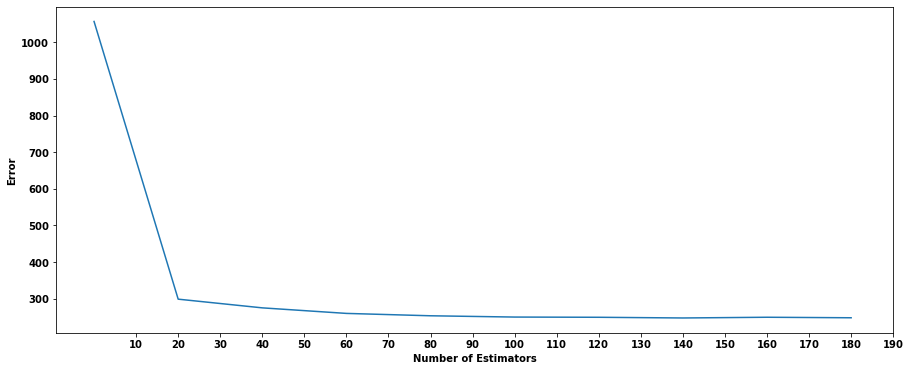

In [180]:
plt.figure(figsize=(15,6))
c = np.arange(0,200,20)
plt.plot(c,rmse_depth_xg)
plt.ylabel("Error")
plt.xlabel("Number of Estimators")
#plt.yticks(np.arange(0,0.5,0.05))
plt.xticks(np.arange(10,200,10))
plt.show()

In [181]:
rmse_depth_lgbm=[]
for i in range(1,200,20):
    lgbm=LGBMRegressor(n_estimators=i)
    lgbm.fit(X_train,y_train)
    y_test_pred=lgbm.predict(X_test)
    y_pred=[]
    for j in y_test_pred:
        if j>0:
            y_pred.append(j)
        else:
            y_pred.append(0)
    rmse=np.sqrt(np.square(np.subtract(y_test,y_pred)).mean())
    rmse_depth_lgbm.append(rmse)
    print("For {} estimators the Root Mean Squared Error is: {}".format(i,rmse))

rmse_depth_lgbm=np.array(rmse_depth_lgbm)

For 1 estimators the Root Mean Squared Error is: 916.5189933455845
For 21 estimators the Root Mean Squared Error is: 365.5818405507884
For 41 estimators the Root Mean Squared Error is: 306.3854871324162
For 61 estimators the Root Mean Squared Error is: 287.3919812900254
For 81 estimators the Root Mean Squared Error is: 277.5448239610049
For 101 estimators the Root Mean Squared Error is: 271.480959574692
For 121 estimators the Root Mean Squared Error is: 266.22264886453826
For 141 estimators the Root Mean Squared Error is: 262.5485856869243
For 161 estimators the Root Mean Squared Error is: 259.10777451715114
For 181 estimators the Root Mean Squared Error is: 256.7592111272062


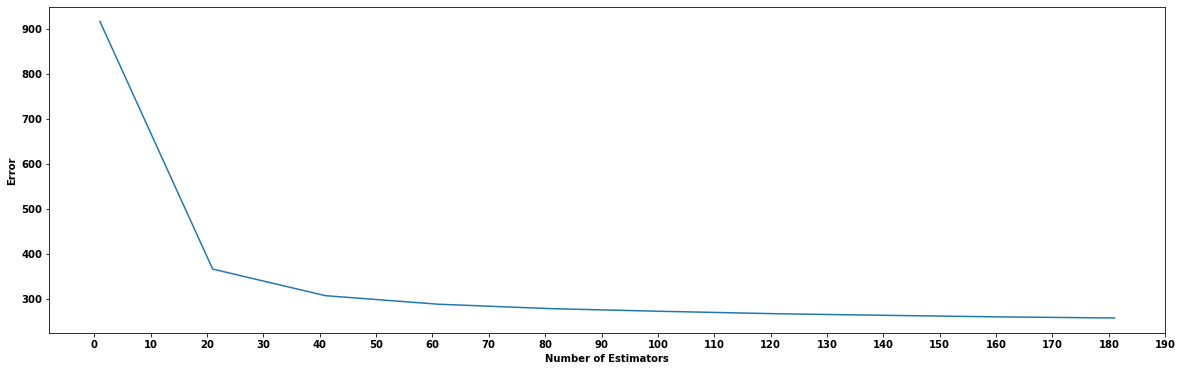

In [182]:
plt.figure(figsize=(20,6))
c = np.arange(1,200,20)
plt.plot(c,rmse_depth_lgbm)
plt.ylabel("Error")
plt.xlabel("Number of Estimators")
plt.xticks(np.arange(0,200,10))
plt.show()

In [183]:
for i in range(1,len(rmse_depth_lgbm)):
    per=(rmse_depth_lgbm[i]-rmse_depth_lgbm[i-1])/rmse_depth_lgbm[i]
    print(abs(per)*100)

150.70145496416066
19.320873835250637
6.608919899968692
3.547952070763178
2.2336241907398158
1.975155281709082
1.3993841056127765
1.3279459391695705
0.9146948923991701


In [184]:
for i in range(1,len(rmse_depth_xg)):
    per=(rmse_depth_xg[i]-rmse_depth_xg[i-1])/rmse_depth_xg[i]
    print(abs(per)*100)

253.7647665006045
8.630445952638123
5.830257594452071
2.5530334340795315
1.4061019931182954
0.23610959366339926
0.7669076610023733
0.7943422061560044
0.5731579474843729


In [185]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [186]:
xgb=XGBRegressor(n_estimators=80)

In [187]:
lgmbr=LGBMRegressor(n_estimators=100)

In [188]:
estimators = [("Xg Boost",xgb),
            ("Decision Tree",dt),
              ("LightGBM",lgmbr)]

In [189]:
stacking_regressor = StackingRegressor(estimators=estimators)

In [190]:
rmse=[]
r2score=[]

In [191]:
def plot_regression_results(ax, y_true, y_pred, model):
    c = [i for i in range(1,len(y_pred)+1,1)]
    ax.plot(c,abs(y_test-y_pred))
    ax.set_ylabel("Error")
    ax.set_xlabel("index")
    ax.set_title("Error Terms for {}".format(model))

Xg Boost training has been completed on training dataset
For Xg Boost the rmse value is 254.3184334567218
For Xg Boost the rsquare value is 0.9349768787461705
Decision Tree training has been completed on training dataset
For Decision Tree the rmse value is 278.002898838636
For Decision Tree the rsquare value is 0.9223018314144633
LightGBM training has been completed on training dataset
For LightGBM the rmse value is 271.7798546553605
For LightGBM the rsquare value is 0.9257414170751219


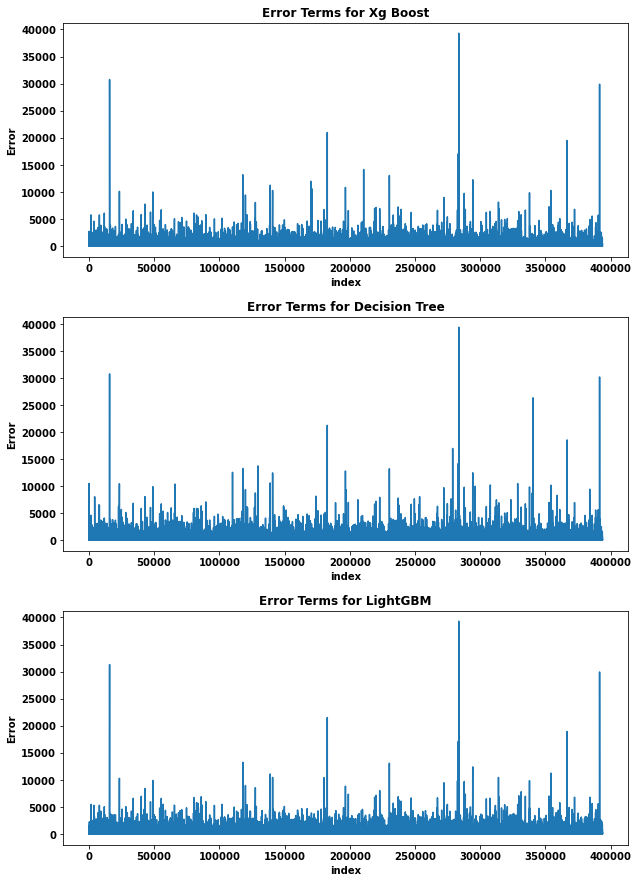

In [192]:
fig, axs = plt.subplots(3, 1, figsize=(9, 12))
axs = np.ravel(axs)
errors_list=[]
for ax, (name, est) in zip(axs, estimators + [('Stacking Regressor',
                                               stacking_regressor)]):
    
    model=est.fit(X_train,y_train)
    print("{} training has been completed on training dataset".format(name))
    y_pred = model.predict(X_test)
    root_mse=np.sqrt(mean_squared_error(y_test,y_pred))
    print("For {} the rmse value is {}".format(name,root_mse))
    rsquare=r2_score(y_test,y_pred)
    print("For {} the rsquare value is {}".format(name,rsquare))
    rmse.append(root_mse)
    r2score.append(rsquare)
    plot_regression_results(ax,y_test,y_pred,name)

plt.tight_layout()
plt.subplots_adjust(top=1)
plt.show()

In [193]:
performance=pd.DataFrame({"Model":['Xg Boost','Decision Tree','LightGBM'],
                         'RMSE Error':rmse,
                         "R Squared Value":r2score})

In [194]:
performance

,Model,RMSE Error,R Squared Value
0,Xg Boost,254.318433,0.934977
1,Decision Tree,278.002899,0.922302
2,LightGBM,271.779855,0.925741


In [195]:
from catboost import CatBoostRegressor,Pool

In [196]:
params = {'iterations':2000,
        'learning_rate':0.3,
        'depth':3,
        'loss_function':'RMSE',
        'eval_metric':'RMSE',
        'verbose':True,
        'use_best_model':True}

In [197]:
model = CatBoostRegressor(**params)

In [198]:
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),  
          use_best_model=True,  
          plot= True   
         )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 848.8126400	test: 832.9466146	best: 832.9466146 (0)	total: 270ms	remaining: 8m 58s
1:	learn: 754.1920223	test: 736.3412443	best: 736.3412443 (1)	total: 374ms	remaining: 6m 13s
2:	learn: 692.0859163	test: 672.5200555	best: 672.5200555 (2)	total: 485ms	remaining: 5m 22s
3:	learn: 652.9239226	test: 632.2489855	best: 632.2489855 (3)	total: 585ms	remaining: 4m 51s
4:	learn: 626.5074053	test: 605.0261617	best: 605.0261617 (4)	total: 679ms	remaining: 4m 30s
5:	learn: 604.2131278	test: 582.1097076	best: 582.1097076 (5)	total: 777ms	remaining: 4m 18s
6:	learn: 587.7248675	test: 564.5866091	best: 564.5866091 (6)	total: 872ms	remaining: 4m 8s
7:	learn: 573.9758769	test: 550.9298994	best: 550.9298994 (7)	total: 972ms	remaining: 4m 2s
8:	learn: 561.6883590	test: 538.0742207	best: 538.0742207 (8)	total: 1.07s	remaining: 3m 57s
9:	learn: 550.5112627	test: 526.5563975	best: 526.5563975 (9)	total: 1.18s	remaining: 3m 54s
10:	learn: 545.3304146	test: 521.0731467	best: 521.0731467 (10)	total: 1

89:	learn: 402.6628102	test: 373.6782633	best: 373.6782633 (89)	total: 9.1s	remaining: 3m 13s
90:	learn: 401.9638365	test: 373.1261878	best: 373.1261878 (90)	total: 9.21s	remaining: 3m 13s
91:	learn: 401.7971110	test: 372.9452582	best: 372.9452582 (91)	total: 9.32s	remaining: 3m 13s
92:	learn: 401.1532640	test: 372.1412114	best: 372.1412114 (92)	total: 9.42s	remaining: 3m 13s
93:	learn: 400.7245267	test: 371.6087890	best: 371.6087890 (93)	total: 9.53s	remaining: 3m 13s
94:	learn: 400.2210726	test: 371.0621414	best: 371.0621414 (94)	total: 9.62s	remaining: 3m 12s
95:	learn: 399.5914024	test: 370.3838326	best: 370.3838326 (95)	total: 9.73s	remaining: 3m 12s
96:	learn: 398.9542953	test: 369.5437312	best: 369.5437312 (96)	total: 9.83s	remaining: 3m 12s
97:	learn: 398.5737083	test: 369.1602018	best: 369.1602018 (97)	total: 9.93s	remaining: 3m 12s
98:	learn: 398.2070315	test: 368.8987588	best: 368.8987588 (98)	total: 10s	remaining: 3m 12s
99:	learn: 398.0350225	test: 368.7084765	best: 368.70

175:	learn: 373.5675237	test: 342.2596591	best: 342.2596591 (175)	total: 18.2s	remaining: 3m 8s
176:	learn: 373.3049418	test: 341.9037440	best: 341.9037440 (176)	total: 18.3s	remaining: 3m 8s
177:	learn: 373.0875004	test: 341.6852777	best: 341.6852777 (177)	total: 18.4s	remaining: 3m 8s
178:	learn: 373.0020184	test: 341.6019326	best: 341.6019326 (178)	total: 18.5s	remaining: 3m 8s
179:	learn: 372.7917118	test: 341.3705715	best: 341.3705715 (179)	total: 18.6s	remaining: 3m 8s
180:	learn: 372.6504092	test: 341.2131853	best: 341.2131853 (180)	total: 18.8s	remaining: 3m 8s
181:	learn: 372.5045127	test: 341.0612017	best: 341.0612017 (181)	total: 18.9s	remaining: 3m 8s
182:	learn: 372.1753113	test: 340.7391329	best: 340.7391329 (182)	total: 19s	remaining: 3m 8s
183:	learn: 372.0074499	test: 340.5906314	best: 340.5906314 (183)	total: 19.1s	remaining: 3m 8s
184:	learn: 371.4989430	test: 340.0238076	best: 340.0238076 (184)	total: 19.2s	remaining: 3m 8s
185:	learn: 371.3605896	test: 339.8335505	

262:	learn: 357.6096906	test: 325.3170911	best: 325.3170911 (262)	total: 27.4s	remaining: 3m
263:	learn: 357.3494871	test: 325.0192708	best: 325.0192708 (263)	total: 27.5s	remaining: 3m
264:	learn: 357.2889302	test: 324.9866257	best: 324.9866257 (264)	total: 27.6s	remaining: 3m
265:	learn: 357.2389433	test: 324.8918124	best: 324.8918124 (265)	total: 27.7s	remaining: 3m
266:	learn: 357.0486278	test: 324.4979254	best: 324.4979254 (266)	total: 27.8s	remaining: 3m
267:	learn: 356.8045865	test: 324.2527597	best: 324.2527597 (267)	total: 27.9s	remaining: 3m
268:	learn: 356.7255398	test: 324.2674892	best: 324.2527597 (267)	total: 28s	remaining: 3m
269:	learn: 356.6889665	test: 324.2261397	best: 324.2261397 (269)	total: 28.1s	remaining: 3m
270:	learn: 356.3567559	test: 323.8719398	best: 323.8719398 (270)	total: 28.2s	remaining: 3m
271:	learn: 356.3158166	test: 323.8261269	best: 323.8261269 (271)	total: 28.3s	remaining: 3m
272:	learn: 356.2297189	test: 323.7391396	best: 323.7391396 (272)	total:

349:	learn: 347.9279967	test: 315.1001637	best: 315.1001637 (349)	total: 36.6s	remaining: 2m 52s
350:	learn: 347.8796053	test: 315.0942906	best: 315.0942906 (350)	total: 36.7s	remaining: 2m 52s
351:	learn: 347.6902177	test: 314.8704351	best: 314.8704351 (351)	total: 36.8s	remaining: 2m 52s
352:	learn: 347.6235123	test: 314.8045512	best: 314.8045512 (352)	total: 36.9s	remaining: 2m 52s
353:	learn: 347.5108681	test: 314.7164890	best: 314.7164890 (353)	total: 37s	remaining: 2m 52s
354:	learn: 347.4280793	test: 314.6084541	best: 314.6084541 (354)	total: 37.1s	remaining: 2m 51s
355:	learn: 347.2319199	test: 314.3842055	best: 314.3842055 (355)	total: 37.2s	remaining: 2m 51s
356:	learn: 347.1753808	test: 314.3352106	best: 314.3352106 (356)	total: 37.3s	remaining: 2m 51s
357:	learn: 347.1464604	test: 314.3034707	best: 314.3034707 (357)	total: 37.4s	remaining: 2m 51s
358:	learn: 347.1070820	test: 314.2568961	best: 314.2568961 (358)	total: 37.5s	remaining: 2m 51s
359:	learn: 347.0560920	test: 31

436:	learn: 340.8680615	test: 307.5822239	best: 307.5822239 (436)	total: 45.8s	remaining: 2m 43s
437:	learn: 340.8555845	test: 307.5686304	best: 307.5686304 (437)	total: 45.9s	remaining: 2m 43s
438:	learn: 340.7463244	test: 307.4769497	best: 307.4769497 (438)	total: 46s	remaining: 2m 43s
439:	learn: 340.7109476	test: 307.4374786	best: 307.4374786 (439)	total: 46.1s	remaining: 2m 43s
440:	learn: 340.6231870	test: 307.3338127	best: 307.3338127 (440)	total: 46.3s	remaining: 2m 43s
441:	learn: 340.5491031	test: 307.2157026	best: 307.2157026 (441)	total: 46.4s	remaining: 2m 43s
442:	learn: 340.4930492	test: 307.1504439	best: 307.1504439 (442)	total: 46.5s	remaining: 2m 43s
443:	learn: 340.4704559	test: 307.1263993	best: 307.1263993 (443)	total: 46.6s	remaining: 2m 43s
444:	learn: 340.3087514	test: 306.9055355	best: 306.9055355 (444)	total: 46.7s	remaining: 2m 43s
445:	learn: 340.1601759	test: 306.7597070	best: 306.7597070 (445)	total: 46.8s	remaining: 2m 43s
446:	learn: 340.1301419	test: 30

523:	learn: 335.0238788	test: 301.1722389	best: 301.1722389 (523)	total: 55.1s	remaining: 2m 35s
524:	learn: 334.9116906	test: 301.0713210	best: 301.0713210 (524)	total: 55.2s	remaining: 2m 35s
525:	learn: 334.8331517	test: 300.9851592	best: 300.9851592 (525)	total: 55.3s	remaining: 2m 34s
526:	learn: 334.7714430	test: 300.9449883	best: 300.9449883 (526)	total: 55.4s	remaining: 2m 34s
527:	learn: 334.7175306	test: 300.8840151	best: 300.8840151 (527)	total: 55.5s	remaining: 2m 34s
528:	learn: 334.6829462	test: 300.8515522	best: 300.8515522 (528)	total: 55.6s	remaining: 2m 34s
529:	learn: 334.6456549	test: 300.8352024	best: 300.8352024 (529)	total: 55.7s	remaining: 2m 34s
530:	learn: 334.6096929	test: 300.7773821	best: 300.7773821 (530)	total: 55.8s	remaining: 2m 34s
531:	learn: 334.5634577	test: 300.7385213	best: 300.7385213 (531)	total: 55.9s	remaining: 2m 34s
532:	learn: 334.5372427	test: 300.7157331	best: 300.7157331 (532)	total: 56.1s	remaining: 2m 34s
533:	learn: 334.5041879	test: 

608:	learn: 331.3678207	test: 297.2257129	best: 297.2257129 (608)	total: 1m 4s	remaining: 2m 26s
609:	learn: 331.3311526	test: 297.1956385	best: 297.1956385 (609)	total: 1m 4s	remaining: 2m 26s
610:	learn: 331.2195406	test: 297.0586817	best: 297.0586817 (610)	total: 1m 4s	remaining: 2m 26s
611:	learn: 331.2041586	test: 297.0492642	best: 297.0492642 (611)	total: 1m 4s	remaining: 2m 26s
612:	learn: 331.1821100	test: 297.0264971	best: 297.0264971 (612)	total: 1m 4s	remaining: 2m 26s
613:	learn: 331.1509821	test: 296.9804788	best: 296.9804788 (613)	total: 1m 4s	remaining: 2m 26s
614:	learn: 331.1340155	test: 296.9637812	best: 296.9637812 (614)	total: 1m 4s	remaining: 2m 26s
615:	learn: 331.0538093	test: 296.8663166	best: 296.8663166 (615)	total: 1m 5s	remaining: 2m 26s
616:	learn: 331.0307919	test: 296.8547803	best: 296.8547803 (616)	total: 1m 5s	remaining: 2m 26s
617:	learn: 330.9859840	test: 296.8402993	best: 296.8402993 (617)	total: 1m 5s	remaining: 2m 25s
618:	learn: 330.9330126	test: 

694:	learn: 328.2034596	test: 294.0748458	best: 294.0748458 (694)	total: 1m 13s	remaining: 2m 18s
695:	learn: 328.1687744	test: 294.0220551	best: 294.0220551 (695)	total: 1m 13s	remaining: 2m 18s
696:	learn: 328.1239163	test: 293.9779573	best: 293.9779573 (696)	total: 1m 13s	remaining: 2m 18s
697:	learn: 328.0923966	test: 293.9409608	best: 293.9409608 (697)	total: 1m 14s	remaining: 2m 18s
698:	learn: 328.0830104	test: 293.9373931	best: 293.9373931 (698)	total: 1m 14s	remaining: 2m 17s
699:	learn: 328.0740055	test: 293.9397485	best: 293.9373931 (698)	total: 1m 14s	remaining: 2m 17s
700:	learn: 328.0556960	test: 293.9163998	best: 293.9163998 (700)	total: 1m 14s	remaining: 2m 17s
701:	learn: 328.0351157	test: 293.8958759	best: 293.8958759 (701)	total: 1m 14s	remaining: 2m 17s
702:	learn: 327.9770165	test: 293.8445546	best: 293.8445546 (702)	total: 1m 14s	remaining: 2m 17s
703:	learn: 327.9383819	test: 293.8489125	best: 293.8445546 (702)	total: 1m 14s	remaining: 2m 17s
704:	learn: 327.9259

778:	learn: 325.8175381	test: 291.7390731	best: 291.7390731 (778)	total: 1m 22s	remaining: 2m 9s
779:	learn: 325.8090082	test: 291.7299992	best: 291.7299992 (779)	total: 1m 22s	remaining: 2m 9s
780:	learn: 325.7987048	test: 291.7167537	best: 291.7167537 (780)	total: 1m 23s	remaining: 2m 9s
781:	learn: 325.7687732	test: 291.6806526	best: 291.6806526 (781)	total: 1m 23s	remaining: 2m 9s
782:	learn: 325.7463116	test: 291.6590729	best: 291.6590729 (782)	total: 1m 23s	remaining: 2m 9s
783:	learn: 325.7269225	test: 291.6428335	best: 291.6428335 (783)	total: 1m 23s	remaining: 2m 9s
784:	learn: 325.6914459	test: 291.6120892	best: 291.6120892 (784)	total: 1m 23s	remaining: 2m 9s
785:	learn: 325.6829459	test: 291.6020871	best: 291.6020871 (785)	total: 1m 23s	remaining: 2m 9s
786:	learn: 325.6671746	test: 291.5849460	best: 291.5849460 (786)	total: 1m 23s	remaining: 2m 8s
787:	learn: 325.6357123	test: 291.5481548	best: 291.5481548 (787)	total: 1m 23s	remaining: 2m 8s
788:	learn: 325.6178923	test: 

863:	learn: 323.6778705	test: 289.6384220	best: 289.6384220 (863)	total: 1m 32s	remaining: 2m 1s
864:	learn: 323.6516170	test: 289.6239776	best: 289.6239776 (864)	total: 1m 32s	remaining: 2m 1s
865:	learn: 323.6371451	test: 289.6183430	best: 289.6183430 (865)	total: 1m 32s	remaining: 2m
866:	learn: 323.6215335	test: 289.6024951	best: 289.6024951 (866)	total: 1m 32s	remaining: 2m
867:	learn: 323.6015978	test: 289.5749877	best: 289.5749877 (867)	total: 1m 32s	remaining: 2m
868:	learn: 323.5951479	test: 289.5678596	best: 289.5678596 (868)	total: 1m 32s	remaining: 2m
869:	learn: 323.5522800	test: 289.5031261	best: 289.5031261 (869)	total: 1m 32s	remaining: 2m
870:	learn: 323.5460826	test: 289.4994544	best: 289.4994544 (870)	total: 1m 32s	remaining: 2m
871:	learn: 323.5274081	test: 289.4656614	best: 289.4656614 (871)	total: 1m 32s	remaining: 2m
872:	learn: 323.4853148	test: 289.4523684	best: 289.4523684 (872)	total: 1m 33s	remaining: 2m
873:	learn: 323.4671081	test: 289.4274453	best: 289.42

948:	learn: 321.4783356	test: 287.3304720	best: 287.3304720 (948)	total: 1m 41s	remaining: 1m 52s
949:	learn: 321.4663392	test: 287.3187938	best: 287.3187938 (949)	total: 1m 41s	remaining: 1m 52s
950:	learn: 321.4216949	test: 287.2529318	best: 287.2529318 (950)	total: 1m 41s	remaining: 1m 52s
951:	learn: 321.3844909	test: 287.2118525	best: 287.2118525 (951)	total: 1m 41s	remaining: 1m 52s
952:	learn: 321.3756074	test: 287.2041033	best: 287.2041033 (952)	total: 1m 41s	remaining: 1m 51s
953:	learn: 321.3664375	test: 287.1979206	best: 287.1979206 (953)	total: 1m 42s	remaining: 1m 51s
954:	learn: 321.3591688	test: 287.1811300	best: 287.1811300 (954)	total: 1m 42s	remaining: 1m 51s
955:	learn: 321.3429385	test: 287.1634771	best: 287.1634771 (955)	total: 1m 42s	remaining: 1m 51s
956:	learn: 321.3344735	test: 287.1537098	best: 287.1537098 (956)	total: 1m 42s	remaining: 1m 51s
957:	learn: 321.3256617	test: 287.1445082	best: 287.1445082 (957)	total: 1m 42s	remaining: 1m 51s
958:	learn: 321.2974

1032:	learn: 319.4964578	test: 285.1953254	best: 285.1953254 (1032)	total: 1m 50s	remaining: 1m 43s
1033:	learn: 319.4913661	test: 285.1903693	best: 285.1903693 (1033)	total: 1m 51s	remaining: 1m 43s
1034:	learn: 319.4703279	test: 285.1715072	best: 285.1715072 (1034)	total: 1m 51s	remaining: 1m 43s
1035:	learn: 319.4532382	test: 285.1532573	best: 285.1532573 (1035)	total: 1m 51s	remaining: 1m 43s
1036:	learn: 319.4181675	test: 285.1224690	best: 285.1224690 (1036)	total: 1m 51s	remaining: 1m 43s
1037:	learn: 319.3891449	test: 285.0950035	best: 285.0950035 (1037)	total: 1m 51s	remaining: 1m 43s
1038:	learn: 319.3840616	test: 285.0875154	best: 285.0875154 (1038)	total: 1m 51s	remaining: 1m 43s
1039:	learn: 319.3789995	test: 285.0799595	best: 285.0799595 (1039)	total: 1m 51s	remaining: 1m 43s
1040:	learn: 319.3705231	test: 285.0640455	best: 285.0640455 (1040)	total: 1m 51s	remaining: 1m 42s
1041:	learn: 319.3349497	test: 285.0146517	best: 285.0146517 (1041)	total: 1m 51s	remaining: 1m 42s


1115:	learn: 317.9046707	test: 283.6599680	best: 283.6599680 (1115)	total: 2m	remaining: 1m 35s
1116:	learn: 317.8982116	test: 283.6577045	best: 283.6577045 (1116)	total: 2m	remaining: 1m 35s
1117:	learn: 317.8854819	test: 283.6422321	best: 283.6422321 (1117)	total: 2m	remaining: 1m 34s
1118:	learn: 317.8605157	test: 283.6211328	best: 283.6211328 (1118)	total: 2m	remaining: 1m 34s
1119:	learn: 317.8525104	test: 283.6175778	best: 283.6175778 (1119)	total: 2m	remaining: 1m 34s
1120:	learn: 317.8336520	test: 283.5941106	best: 283.5941106 (1120)	total: 2m	remaining: 1m 34s
1121:	learn: 317.8067193	test: 283.5666355	best: 283.5666355 (1121)	total: 2m	remaining: 1m 34s
1122:	learn: 317.7974450	test: 283.5490233	best: 283.5490233 (1122)	total: 2m	remaining: 1m 34s
1123:	learn: 317.7880601	test: 283.5423004	best: 283.5423004 (1123)	total: 2m 1s	remaining: 1m 34s
1124:	learn: 317.7632554	test: 283.5341295	best: 283.5341295 (1124)	total: 2m 1s	remaining: 1m 34s
1125:	learn: 317.7367473	test: 283

1199:	learn: 316.3559351	test: 282.0719385	best: 282.0719385 (1199)	total: 2m 9s	remaining: 1m 26s
1200:	learn: 316.3475869	test: 282.0710050	best: 282.0710050 (1200)	total: 2m 9s	remaining: 1m 26s
1201:	learn: 316.3274658	test: 282.0476796	best: 282.0476796 (1201)	total: 2m 9s	remaining: 1m 26s
1202:	learn: 316.2861098	test: 281.9876893	best: 281.9876893 (1202)	total: 2m 9s	remaining: 1m 26s
1203:	learn: 316.2642582	test: 281.9894480	best: 281.9876893 (1202)	total: 2m 10s	remaining: 1m 25s
1204:	learn: 316.2367934	test: 281.9551158	best: 281.9551158 (1204)	total: 2m 10s	remaining: 1m 25s
1205:	learn: 316.1925456	test: 281.9577610	best: 281.9551158 (1204)	total: 2m 10s	remaining: 1m 25s
1206:	learn: 316.1798998	test: 281.9273589	best: 281.9273589 (1206)	total: 2m 10s	remaining: 1m 25s
1207:	learn: 316.1752810	test: 281.9233157	best: 281.9233157 (1207)	total: 2m 10s	remaining: 1m 25s
1208:	learn: 316.1685404	test: 281.9361712	best: 281.9233157 (1207)	total: 2m 10s	remaining: 1m 25s
1209

1282:	learn: 314.8224152	test: 280.5543435	best: 280.5543435 (1282)	total: 2m 18s	remaining: 1m 17s
1283:	learn: 314.8075397	test: 280.5399138	best: 280.5399138 (1283)	total: 2m 18s	remaining: 1m 17s
1284:	learn: 314.8018404	test: 280.5269144	best: 280.5269144 (1284)	total: 2m 18s	remaining: 1m 17s
1285:	learn: 314.7789271	test: 280.5239120	best: 280.5239120 (1285)	total: 2m 18s	remaining: 1m 17s
1286:	learn: 314.7496723	test: 280.4882224	best: 280.4882224 (1286)	total: 2m 19s	remaining: 1m 17s
1287:	learn: 314.7342045	test: 280.4636141	best: 280.4636141 (1287)	total: 2m 19s	remaining: 1m 16s
1288:	learn: 314.7089348	test: 280.4645430	best: 280.4636141 (1287)	total: 2m 19s	remaining: 1m 16s
1289:	learn: 314.6688450	test: 280.4331594	best: 280.4331594 (1289)	total: 2m 19s	remaining: 1m 16s
1290:	learn: 314.6641294	test: 280.4237186	best: 280.4237186 (1290)	total: 2m 19s	remaining: 1m 16s
1291:	learn: 314.6582188	test: 280.4162089	best: 280.4162089 (1291)	total: 2m 19s	remaining: 1m 16s


1365:	learn: 313.6078477	test: 279.5411043	best: 279.5411043 (1365)	total: 2m 27s	remaining: 1m 8s
1366:	learn: 313.5951315	test: 279.5336580	best: 279.5336580 (1366)	total: 2m 27s	remaining: 1m 8s
1367:	learn: 313.5888195	test: 279.5245681	best: 279.5245681 (1367)	total: 2m 27s	remaining: 1m 8s
1368:	learn: 313.5814199	test: 279.5111048	best: 279.5111048 (1368)	total: 2m 28s	remaining: 1m 8s
1369:	learn: 313.5597424	test: 279.4886568	best: 279.4886568 (1369)	total: 2m 28s	remaining: 1m 8s
1370:	learn: 313.5485858	test: 279.4719380	best: 279.4719380 (1370)	total: 2m 28s	remaining: 1m 8s
1371:	learn: 313.5374929	test: 279.4638270	best: 279.4638270 (1371)	total: 2m 28s	remaining: 1m 7s
1372:	learn: 313.5209986	test: 279.4482408	best: 279.4482408 (1372)	total: 2m 28s	remaining: 1m 7s
1373:	learn: 313.5156653	test: 279.4420512	best: 279.4420512 (1373)	total: 2m 28s	remaining: 1m 7s
1374:	learn: 313.5092137	test: 279.4356401	best: 279.4356401 (1374)	total: 2m 28s	remaining: 1m 7s
1375:	lear

1450:	learn: 312.2819990	test: 278.2127363	best: 278.2127363 (1450)	total: 2m 37s	remaining: 59.5s
1451:	learn: 312.2697038	test: 278.1916459	best: 278.1916459 (1451)	total: 2m 37s	remaining: 59.4s
1452:	learn: 312.2529213	test: 278.1942907	best: 278.1916459 (1451)	total: 2m 37s	remaining: 59.3s
1453:	learn: 312.2478711	test: 278.1892297	best: 278.1892297 (1453)	total: 2m 37s	remaining: 59.1s
1454:	learn: 312.2380167	test: 278.1770984	best: 278.1770984 (1454)	total: 2m 37s	remaining: 59s
1455:	learn: 312.2304910	test: 278.1717179	best: 278.1717179 (1455)	total: 2m 37s	remaining: 58.9s
1456:	learn: 312.2254555	test: 278.1656975	best: 278.1656975 (1456)	total: 2m 37s	remaining: 58.8s
1457:	learn: 312.2189206	test: 278.1570734	best: 278.1570734 (1457)	total: 2m 37s	remaining: 58.7s
1458:	learn: 312.2112468	test: 278.1582054	best: 278.1570734 (1457)	total: 2m 38s	remaining: 58.6s
1459:	learn: 312.2047095	test: 278.1296951	best: 278.1296951 (1459)	total: 2m 38s	remaining: 58.5s
1460:	learn:

1533:	learn: 311.2943333	test: 277.3550034	best: 277.3550034 (1533)	total: 2m 46s	remaining: 50.6s
1534:	learn: 311.2881212	test: 277.3522609	best: 277.3522609 (1534)	total: 2m 46s	remaining: 50.5s
1535:	learn: 311.2803493	test: 277.3427930	best: 277.3427930 (1535)	total: 2m 46s	remaining: 50.3s
1536:	learn: 311.2770008	test: 277.3391687	best: 277.3391687 (1536)	total: 2m 46s	remaining: 50.2s
1537:	learn: 311.2620844	test: 277.3443748	best: 277.3391687 (1536)	total: 2m 46s	remaining: 50.1s
1538:	learn: 311.2518486	test: 277.3467545	best: 277.3391687 (1536)	total: 2m 46s	remaining: 50s
1539:	learn: 311.2256592	test: 277.2886021	best: 277.2886021 (1539)	total: 2m 47s	remaining: 49.9s
1540:	learn: 311.1801480	test: 277.2353247	best: 277.2353247 (1540)	total: 2m 47s	remaining: 49.8s
1541:	learn: 311.1737164	test: 277.2271830	best: 277.2271830 (1541)	total: 2m 47s	remaining: 49.7s
1542:	learn: 311.1678645	test: 277.2245370	best: 277.2245370 (1542)	total: 2m 47s	remaining: 49.6s
1543:	learn:

1616:	learn: 310.0656244	test: 276.0835192	best: 276.0835192 (1616)	total: 2m 55s	remaining: 41.6s
1617:	learn: 310.0531438	test: 276.0797410	best: 276.0797410 (1617)	total: 2m 55s	remaining: 41.5s
1618:	learn: 310.0431763	test: 276.0690687	best: 276.0690687 (1618)	total: 2m 55s	remaining: 41.4s
1619:	learn: 310.0347169	test: 276.0678978	best: 276.0678978 (1619)	total: 2m 55s	remaining: 41.3s
1620:	learn: 310.0232711	test: 276.0566181	best: 276.0566181 (1620)	total: 2m 56s	remaining: 41.2s
1621:	learn: 310.0170486	test: 276.0483108	best: 276.0483108 (1621)	total: 2m 56s	remaining: 41.1s
1622:	learn: 310.0136400	test: 276.0454974	best: 276.0454974 (1622)	total: 2m 56s	remaining: 41s
1623:	learn: 310.0068306	test: 276.0355606	best: 276.0355606 (1623)	total: 2m 56s	remaining: 40.9s
1624:	learn: 310.0011782	test: 276.0333790	best: 276.0333790 (1624)	total: 2m 56s	remaining: 40.8s
1625:	learn: 309.9935455	test: 276.0232120	best: 276.0232120 (1625)	total: 2m 56s	remaining: 40.6s
1626:	learn:

1700:	learn: 309.2644477	test: 275.2656376	best: 275.2656376 (1700)	total: 3m 5s	remaining: 32.5s
1701:	learn: 309.2350687	test: 275.2333425	best: 275.2333425 (1701)	total: 3m 5s	remaining: 32.4s
1702:	learn: 309.2303396	test: 275.2294362	best: 275.2294362 (1702)	total: 3m 5s	remaining: 32.3s
1703:	learn: 309.2101390	test: 275.1698426	best: 275.1698426 (1703)	total: 3m 5s	remaining: 32.2s
1704:	learn: 309.2065141	test: 275.1670500	best: 275.1670500 (1704)	total: 3m 5s	remaining: 32.1s
1705:	learn: 309.1942520	test: 275.1464845	best: 275.1464845 (1705)	total: 3m 5s	remaining: 32s
1706:	learn: 309.1713679	test: 275.1398554	best: 275.1398554 (1706)	total: 3m 5s	remaining: 31.9s
1707:	learn: 309.1585995	test: 275.1428786	best: 275.1398554 (1706)	total: 3m 5s	remaining: 31.8s
1708:	learn: 309.1504451	test: 275.1324337	best: 275.1324337 (1708)	total: 3m 5s	remaining: 31.7s
1709:	learn: 309.1422871	test: 275.1232869	best: 275.1232869 (1709)	total: 3m 6s	remaining: 31.6s
1710:	learn: 309.13572

1784:	learn: 308.4690428	test: 274.5912240	best: 274.5650644 (1783)	total: 3m 14s	remaining: 23.4s
1785:	learn: 308.4583840	test: 274.5980335	best: 274.5650644 (1783)	total: 3m 14s	remaining: 23.3s
1786:	learn: 308.4531691	test: 274.5924313	best: 274.5650644 (1783)	total: 3m 14s	remaining: 23.2s
1787:	learn: 308.4481516	test: 274.5923263	best: 274.5650644 (1783)	total: 3m 14s	remaining: 23.1s
1788:	learn: 308.4394866	test: 274.6000603	best: 274.5650644 (1783)	total: 3m 15s	remaining: 23s
1789:	learn: 308.4273790	test: 274.5899152	best: 274.5650644 (1783)	total: 3m 15s	remaining: 22.9s
1790:	learn: 308.4203995	test: 274.5935678	best: 274.5650644 (1783)	total: 3m 15s	remaining: 22.8s
1791:	learn: 308.4138386	test: 274.5846592	best: 274.5650644 (1783)	total: 3m 15s	remaining: 22.7s
1792:	learn: 308.4109323	test: 274.5815920	best: 274.5650644 (1783)	total: 3m 15s	remaining: 22.6s
1793:	learn: 308.4053258	test: 274.5746944	best: 274.5650644 (1783)	total: 3m 15s	remaining: 22.5s
1794:	learn:

1867:	learn: 307.7963625	test: 274.1154126	best: 274.1048450 (1866)	total: 3m 23s	remaining: 14.4s
1868:	learn: 307.7861731	test: 274.1111045	best: 274.1048450 (1866)	total: 3m 24s	remaining: 14.3s
1869:	learn: 307.7775095	test: 274.0962394	best: 274.0962394 (1869)	total: 3m 24s	remaining: 14.2s
1870:	learn: 307.7726003	test: 274.0900085	best: 274.0900085 (1870)	total: 3m 24s	remaining: 14.1s
1871:	learn: 307.7682855	test: 274.0869119	best: 274.0869119 (1871)	total: 3m 24s	remaining: 14s
1872:	learn: 307.7629973	test: 274.0799244	best: 274.0799244 (1872)	total: 3m 24s	remaining: 13.9s
1873:	learn: 307.7594481	test: 274.0760040	best: 274.0760040 (1873)	total: 3m 24s	remaining: 13.8s
1874:	learn: 307.7358859	test: 274.0457322	best: 274.0457322 (1874)	total: 3m 24s	remaining: 13.6s
1875:	learn: 307.7291056	test: 274.0461545	best: 274.0457322 (1874)	total: 3m 24s	remaining: 13.5s
1876:	learn: 307.7234292	test: 274.0418902	best: 274.0418902 (1876)	total: 3m 24s	remaining: 13.4s
1877:	learn:

1950:	learn: 307.1152817	test: 273.3902747	best: 273.3902747 (1950)	total: 3m 33s	remaining: 5.36s
1951:	learn: 307.1046248	test: 273.3818543	best: 273.3818543 (1951)	total: 3m 33s	remaining: 5.25s
1952:	learn: 307.1006040	test: 273.3779083	best: 273.3779083 (1952)	total: 3m 33s	remaining: 5.14s
1953:	learn: 307.0981259	test: 273.3749466	best: 273.3749466 (1953)	total: 3m 33s	remaining: 5.03s
1954:	learn: 307.0959722	test: 273.3730841	best: 273.3730841 (1954)	total: 3m 33s	remaining: 4.92s
1955:	learn: 307.0770943	test: 273.3304168	best: 273.3304168 (1955)	total: 3m 33s	remaining: 4.81s
1956:	learn: 307.0619202	test: 273.3076131	best: 273.3076131 (1956)	total: 3m 34s	remaining: 4.7s
1957:	learn: 307.0537889	test: 273.3033171	best: 273.3033171 (1957)	total: 3m 34s	remaining: 4.59s
1958:	learn: 307.0419938	test: 273.2917195	best: 273.2917195 (1958)	total: 3m 34s	remaining: 4.48s
1959:	learn: 307.0388733	test: 273.2892590	best: 273.2892590 (1959)	total: 3m 34s	remaining: 4.37s
1960:	learn

In [199]:
y_pred=model.predict(X_test)

In [200]:
y_test_pred=[]

In [201]:
for i in y_pred:
    if i<0:
        y_test_pred.append(0)
    else:
        y_test_pred.append(i)

In [202]:
rmse_cat=np.sqrt(mean_squared_error(y_pred,y_test))

In [203]:
r2score_cat=r2_score(y_pred,y_test)

In [204]:
cat={'Model': 'CatBoost', 'RMSE Error': rmse_cat,"R Squared Value":r2score_cat}
performance = performance.append(cat, ignore_index = True)

In [205]:
performance

,Model,RMSE Error,R Squared Value
0,Xg Boost,254.318433,0.934977
1,Decision Tree,278.002899,0.922302
2,LightGBM,271.779855,0.925741
3,CatBoost,272.992462,0.918162


In [206]:
df.head()

,store_nbr,sales,cluster,WorkDay,dcoilwtico,transactions,GROCERY I,BEVERAGES,PRODUCE,CLEANING,...,c_Daule,c_Loja,c_Manta,c_Babahoyo,c_Libertad,c_Esmeraldas,store_type,day,month,year
0,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
1,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
2,25,2,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013
3,25,810,1,0,93.14,770,0,1,0,0,...,0,0,0,0,0,0,3,1,1,2013
4,25,0,1,0,93.14,770,0,0,0,0,...,0,0,0,0,0,0,3,1,1,2013


In [207]:
new_cols=['day', 'month', 'year','c_Quito', 'c_Cayambe','c_Cuenca', 'c_Ambato', 'c_Daule', 'c_Loja', 'c_Manta', 'c_Babahoyo',
       'c_Libertad', 'c_Esmeraldas', 'store_nbr', 'GROCERY I', 'BEVERAGES', 'PRODUCE', 'CLEANING',
       'DAIRY', 'BREAD/BAKERY', 'MEATS', 'POULTRY', 'DELI', 'PERSONAL CARE']

In [208]:
new_X=X[new_cols]

In [209]:
new_X

,day,month,year,c_Quito,c_Cayambe,c_Cuenca,c_Ambato,c_Daule,c_Loja,c_Manta,...,GROCERY I,BEVERAGES,PRODUCE,CLEANING,DAIRY,BREAD/BAKERY,MEATS,POULTRY,DELI,PERSONAL CARE
0,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2013,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1,1,2013,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1968478,15,8,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1968479,15,8,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1968480,15,8,2017,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1968481,15,8,2017,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [210]:
X=df.drop("sales",1)

In [211]:
y=df.sales.values.reshape(-1,1)

In [212]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=0)

In [213]:
from sklearn.preprocessing import MinMaxScaler

In [214]:
yscaler=MinMaxScaler()

In [215]:
yscaler.fit(y_train)

MinMaxScaler()

In [216]:
y_train=yscaler.transform(y_train)

In [217]:
xgb_final=XGBRegressor(colsample_bytree=0.6930771814253306,
 max_depth=27,
 min_child_weight=9,
 reg_lambda=0.2729610025524414,
                       n_estimators=55,
                 gpu_id=0,tree_method='gpu_hist',n_jobs=-1)

In [218]:
xgb_final.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6930771814253306,
             enable_categorical=False, gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=27, min_child_weight=9, missing=nan,
             monotone_constraints='()', n_estimators=55, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.2729610025524414, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [219]:
y_test_pred=xgb_final.predict(X_test)

In [220]:
y_test_pred=y_test_pred.reshape(-1,1)
y_test_pred=yscaler.inverse_transform(y_test_pred)

In [221]:
y_pred=[]
count=0
for i in y_test_pred:
    if i<0:
        y_pred.append(0)
        count+=1
    else:
        y_pred.append(int(i))

np.sqrt(mean_squared_error(y_test,y_pred))

227.51857528191888

In [222]:
print("Number of Negative values that are converted into 0: ",count)

Number of Negative values that are converted into 0:  4072


In [223]:
r2_score(y_test,y_pred)

0.9479589737509613

In [224]:
check=xgb_final.predict(X_test.head(1))

In [225]:
check

array([0.00144972], dtype=float32)

In [226]:
int(yscaler.inverse_transform(check.reshape(-1,1)))

180

In [227]:
y_test[0]

array([195], dtype=int64)

In [228]:
true=[]

In [229]:
negative=[]

In [230]:
for i in range(len(y_test_pred)):
    if y_test_pred[i]<0:
        negative.append(int(y_test_pred[i]))
        true.append(int(y_test[i]))

In [231]:
error=pd.DataFrame({'true':true,
                   'negative':negative})

In [232]:
error

,true,negative
0,3,-10
1,0,-113
2,0,-1
3,8,0
4,0,-17
...,...,...
4067,0,-5
4068,93,-19
4069,5,-45
4070,0,-7


<AxesSubplot:xlabel='true', ylabel='Density'>

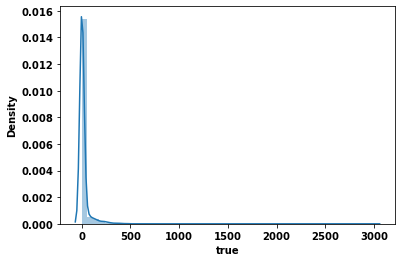

In [233]:
sns.distplot(error['true'])

<AxesSubplot:xlabel='negative', ylabel='Density'>

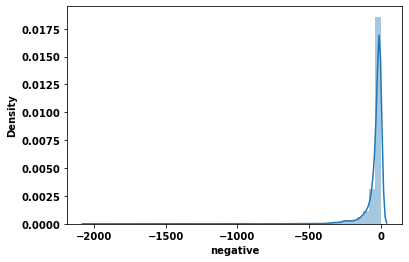

In [234]:
sns.distplot(error['negative'])

In [235]:
xgb_final

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6930771814253306,
             enable_categorical=False, gamma=0, gpu_id=0, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=27, min_child_weight=9, missing=nan,
             monotone_constraints='()', n_estimators=55, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0.2729610025524414, scale_pos_weight=1, subsample=1,
             tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [236]:
import shap

In [237]:
shap.initjs()

In [240]:
# Using a random sample of the dataframe for better time computation
X_sampled = X_train.sample(100, random_state=10)

In [241]:
explainer = shap.TreeExplainer(xgb_final)
shap_values = explainer.shap_values(X_sampled)

In [242]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])

In [243]:
shap.force_plot(explainer.expected_value, shap_values, X_train)

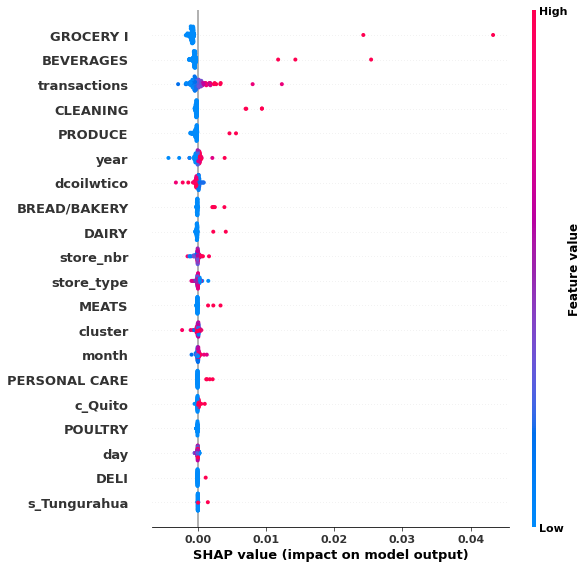

In [244]:
shap.summary_plot(shap_values, X_sampled)

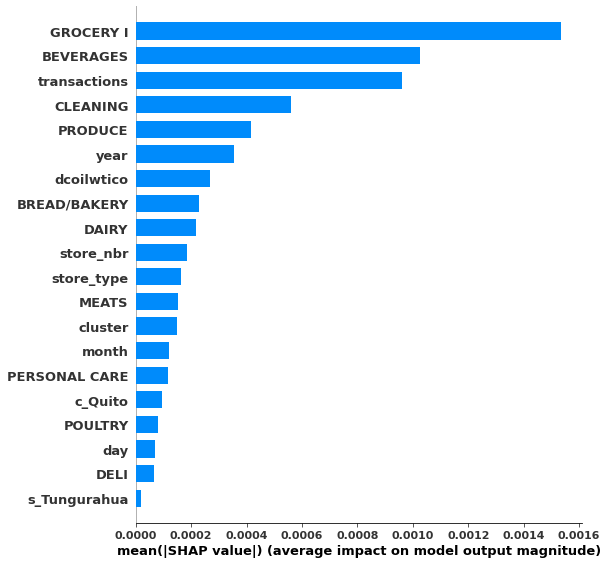

In [245]:
shap.summary_plot(shap_values, X_sampled, plot_type="bar")